<a href="https://colab.research.google.com/github/JenBanks8585/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/Jen_Banks__LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [0]:
df = df.drop('diagnosis', axis=1).drop('Unnamed: 32',axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
df.shape

(569, 31)

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
cancer= df.copy()
cancer.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
# Initial data exploration

cancer.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [0]:
cancer.isnull().sum().head(3)

id              0
radius_mean     0
texture_mean    0
dtype: int64

In [0]:
cancer.dtypes.head(3)

id                int64
radius_mean     float64
texture_mean    float64
dtype: object

In [0]:
# Use Pu239 and Pu240 as our features.
features = ['radius_mean', 'texture_mean']

In [0]:
cancer_points=cancer.loc[:, 'radius_mean':'texture_mean']
cancer_points.head()

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [0]:
# Using a function to generate an "elbow" graph

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cancer_points)
    sum_of_squared_distances.append(km.inertia_)


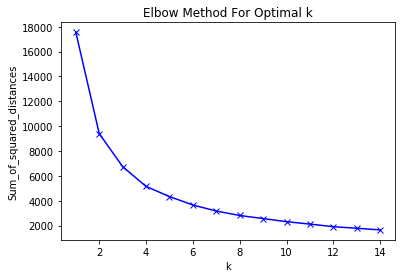

In [0]:
# Plotting a Scree Plot to estimake k

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Perform K-Means Clustering on the Dataset

In [0]:
# This is all a lot easier when we use a library instead of doing it by hand.
from sklearn.cluster import KMeans

In [0]:
# Instantiate the sklearn class, and pick a number of clusters.
kmeans = KMeans(n_clusters=4)

In [0]:
# fit the instantiate model to our data.
kmeans.fit(cancer_points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# the labels are the same as the 3 centers.
labels = kmeans.labels_


In [0]:
# using the metrics module 
from sklearn import metrics

In [0]:
#Computing the silhouette score?

metrics.silhouette_score(cancer_points, labels, metric='euclidean')

0.35618943322633206

In [0]:
# Initialize an instance of the KMeans class from sklearn.
k = 4
cancer_model1 = KMeans(n_clusters=k, max_iter=1)

In [0]:
# Fit the instantiated model to our sliced dataframe
cancer_model1.fit(cancer_points[features].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# Assign clusters back to our dataframe
cancer_points['cluster'] = cancer_model1.labels_

In [0]:
# Get our centroids
centroids= cancer_model1.cluster_centers_

In [0]:
# turn them into a dataframe
cc  =  pd.DataFrame(centroids)
cc.head()

,0,1
0,12.112555,13.986555
1,18.924155,20.974859
2,12.337029,18.824375
3,13.954676,26.693088


In [0]:
# Setup some colors for plotting
base_colors  =  ['r', 'g', 'b', 'y']
colors       =  [base_colors[centroid] for centroid in cancer_model1.labels_]

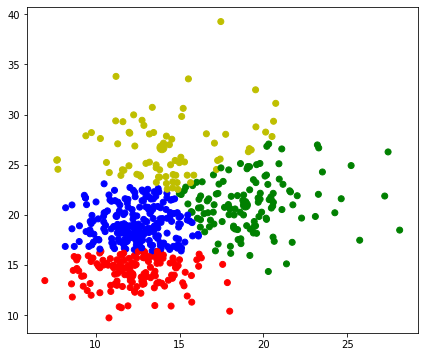

In [0]:
# Plot the scatter of our points with calculated centroids
fig, ax =  plt.subplots(figsize=(7,6))
ax.scatter(cancer_points[features[0]], cancer_points[features[1]], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);

In [0]:
# what's our silhouette score?
metrics.silhouette_score(cancer_points, cancer_model1.labels_, metric='euclidean')

0.39217295314985345

In [0]:
# What is the predicted centroid for each data point?  
cancer_model1.labels_

array([0, 1, 1, 2, 1, 0, 1, 2, 2, 3, 1, 2, 1, 3, 2, 3, 2, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 2, 1, 3, 0, 1, 2, 1, 3, 2, 1, 2, 2, 3, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 3, 3,
       2, 2, 2, 2, 1, 0, 3, 0, 2, 1, 0, 1, 1, 2, 2, 0, 1, 3, 0, 1, 2, 1,
       2, 0, 3, 1, 0, 2, 2, 1, 2, 2, 0, 2, 3, 0, 2, 2, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 3, 1, 2, 1, 0, 2,
       1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       0, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0,
       2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 3, 2, 2, 3, 3, 0, 2, 1,
       1, 2, 2, 1, 1, 3, 2, 2, 2, 1, 2, 0, 1, 2, 1, 3, 3, 2, 2, 2, 1, 3,
       0, 0, 2, 1, 2, 0, 0, 0, 3, 2, 1, 3, 3, 3, 0, 2, 1, 1, 3, 3, 0, 0,
       2, 3, 1, 2, 2, 0, 3, 0, 1, 2, 1, 1, 1, 2, 3, 2, 3, 3, 1, 1, 1, 2,
       1, 3, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 3, 0, 1, 1, 0, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1,

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
# Your Code Here

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
##### Your Code Here #####

# instantiate the SKLearn class for standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
# this time keep all 4 variables
features2=list(cancer.columns)
len(features2)

31

In [0]:
# Standardize the dataset (default is normalization)
scaled_data = scaler.fit_transform(cancer)

In [0]:
# Turn it back into a dataframe.
cancer_scaled = pd.DataFrame(scaled_data,columns=features2)


In [0]:
# So did that work? the mean should be zero
cancer_scaled.mean(), cancer_scaled[features].std()

(id                         8.877882e-18
 radius_mean               -1.256562e-16
 texture_mean               1.049736e-16
 perimeter_mean            -1.272171e-16
 area_mean                 -1.900452e-16
 smoothness_mean            1.490704e-16
 compactness_mean           2.544342e-16
 concavity_mean            -1.338511e-16
 concave points_mean       -8.429110e-17
 symmetry_mean              2.081912e-16
 fractal_dimension_mean     5.408679e-16
 radius_se                  2.475807e-16
 texture_se                -9.912009e-17
 perimeter_se              -2.968237e-16
 area_se                   -1.088760e-16
 smoothness_se              4.426014e-16
 compactness_se             1.958988e-16
 concavity_se               1.678017e-16
 concave points_se          2.185325e-17
 symmetry_se                1.523874e-16
 fractal_dimension_se      -5.658430e-17
 radius_worst              -7.988142e-16
 texture_worst             -1.834112e-17
 perimeter_worst           -4.015534e-16
 area_worst     

In [0]:
# import and instantiate the PCA class
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [0]:
# Apply PCA to the data
pca_features = pca.fit_transform(cancer_scaled)
pca_features[:5]

array([[ 9.18319981,  1.97127176, -1.17162519,  3.63934911],
       [ 2.38329763, -3.75345821, -0.580228  ,  1.1274595 ],
       [ 5.74247239, -1.08035044, -0.53308753,  0.90347173],
       [ 7.12438395, 10.2722256 , -3.15016093,  0.12153144],
       [ 3.94569384, -1.95968919,  1.4011779 ,  2.93756668]])

In [0]:
#  how much variation did each principal component explain?
pca.explained_variance_ratio_

array([0.42864701, 0.18376792, 0.09146436, 0.06391475])

In [0]:
# How much total variance did we explain?
sum(pca.explained_variance_ratio_)

0.7677940324797394

In [0]:
# Turn that into a dataframe.
cancer_pca=pd.DataFrame(pca_features, columns=['comp1', 'comp2', 'comp3', 'comp4'])
cancer_pca.head()

,comp1,comp2,comp3,comp4
0,9.183200,1.971272,-1.171625,3.639349
1,2.383298,-3.753458,-0.580228,1.127460
2,5.742472,-1.080350,-0.533088,0.903472
3,7.124384,10.272226,-3.150161,0.121531
4,3.945694,-1.959689,1.401178,2.937567


In [0]:

# Initialize an instance of the KMeans class from sklearn.
k = 4
model2 = KMeans(n_clusters=k, max_iter=1)

In [0]:
# Fit the instantiated model to our sliced dataframe
model2.fit(cancer_pca.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# Assign predicted clusters back to our dataframe
cancer_pca['cluster'] = model2.labels_

In [0]:
# Get our centroids
centroids2    =  model2.cluster_centers_

In [0]:
# turn them into a dataframe
cc2  =  pd.DataFrame(centroids2)
cc2.head()


,0,1,2,3
0,-2.547935,-0.106471,0.021687,0.257604
1,1.611353,2.741989,-0.609864,-1.108325
2,7.837902,-1.681008,0.896184,0.423285
3,2.668156,-1.254876,0.063682,-0.000939


In [0]:
# Setup some colors for plotting
base_colors2  =  ['r', 'g', 'b', 'y']
colors2       =  [base_colors2[centroid] for centroid in model2.labels_]

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


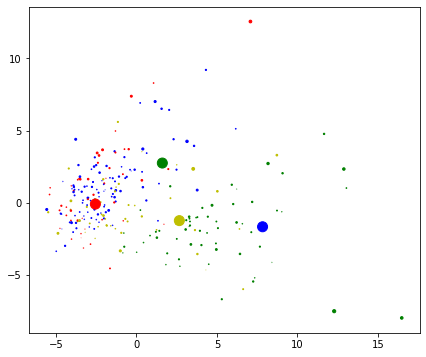

In [0]:

# Plot the scatter of our points with calculated centroids
fig, ax      =  plt.subplots(figsize=(7,6))
ax.scatter(cancer_pca['comp1'], cancer_pca['comp2'], cancer_pca['comp3'], c=colors)
ax.scatter(cc2[0], cc2[1], c=base_colors, s=100);

In [0]:
# what's our silhouette score?
metrics.silhouette_score(cancer_pca, model2.labels_, metric='euclidean')

0.37828678840677626

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project